# Brief introduction to use VitalDB_signal extractor (https://vitaldb.net/)
-------
* [1.Input your file name (.vital)](## 1.Input your file name (.vital)
* [2.select specific time](## 2.Select specific time)
* [3.get specific signals](## 3.Get specific signals)

<img src="resource/VitalDB_s.png"/>

### Known issue : several errors in sampling rate from .vital

In [1]:
# import libaries
import os
import csv
import glob
import datetime
import numpy as np
import pandas as pd
import AMCVitalReader as vr

## 1.Input your file name (.vital)
-----

In [2]:
fname = 'F-07_180425_080352_abnormal'         # the name of .vital file

In [3]:
# get header data
vr_data = vr.vital_reader(fname+'.vital')
vr_data.read_header()
vr_data.read_packets()

# # get time data
a,b = vr_data.read_wave_datetime('DI-1120','VOLT')
print("###File information###")
print("[time start]",a[0])
print("[time end]",a[-1])
print("[time length]",a[-1]-a[0])

# # get time data
# a,b = vr_data.read_number_datetime('Intellivue','ECG_HR')
# print("[time start]",a[0])
# print("[time end]",a[-1])
# print("[time length]",a[-1]-a[0])
# print("[time length]",len(a))

###File information###
[time start] 2018-04-25 08:03:54.129897
[time end] 2018-04-25 09:42:57.535497
[time length] 1:39:03.405600


# 2.Select specific time 
-----

In [4]:
start_year   = 2018 #
start_month  = 4    #
start_date   = 25   #
start_hour   = 8
start_minute = 34
start_second = 34

end_year     = start_year
end_month    = start_month
end_date     = start_date
end_hour   = 8
end_minute = 34
end_second = 54

# end_year     = start_year   
# end_month    = start_month
# end_date     = start_date
# end_hour   = start_hour + 60
# end_minute = start_minute + 60
# end_second = start_second + 60

comment = 'ILD, Rt OLV'         # the comment which is labeled by Dr.Sunghun Kim

# 3.get specific signals
---

In [5]:
#  blank if no signal to input

# device0 : DI-1120
device0_name   = 'DI-1120'
device0_signal = ['VOLT']
#  blank if no signal to input []

# device1 : Intellivue
device1_name   = 'Intellivue'
device1_signal = []
#  blank if no signal to input []

# device2 : Primus
device2_name   = 'Primus'
device2_signal = ['CO2']
#  blank if no signal to input []

devicedis = pd.read_csv('resource/vitalDB_device.csv')
devicedis

,Device/Variable,Description
0,# DI-1120/VOLT,호흡음/심음
1,# Intellivue/ECG_HR,심전도 맥박수
2,# Intellivue/PLETH_SAT_O2,광혈류측정기 산소포화도
3,# Intellivue/PLETH_HR,광혈류측정기(PPG) 맥박수
4,# Intellivue/PLETH_PERF_REL,??
5,# Intellivue/AWAY_CO2_ET,호기말 이산화탄소분압
6,# Intellivue/AWAY_CO2_INSP_MIN,흡기 이산화탄소
7,# Intellivue/O2_ET_PERC,호기말 산소 퍼센트
8,# Intellivue/O2_INSP_PERC,흡기 산소 퍼센트
9,# Intellivue/N2O_ET,호기말 아산화질소분압


In [6]:
fname_with_time = fname+'_'+comment+'_'+str(start_hour)+':'+str(start_minute)+':'+str(start_second)+'to'+str(end_hour)+':'+str(end_minute)+':'+str(end_second)
print('[fname_with_time]',fname_with_time)
print('total',len(device0_signal),'signal(s) from',device0_name)
print('total',len(device1_signal),'signal(s) from',device1_name)
print('total',len(device2_signal),'signal(s) from',device2_name)

# build signal_table
signal_table=[]
column_name=[]

for i in range(0,len(device0_signal)+len(device1_signal)+len(device2_signal)):
    temp=[]
    if i<len(device0_signal):
        print('i=',i,', from device0')
        temp = vr_data.read_wave_datetime_interval(device0_name,device0_signal[i],datetime.datetime(start_year,start_month,start_date,start_hour,start_minute,start_second),datetime.datetime(end_year,end_month,end_date,end_hour,end_minute,end_second))
        signal_table.append(temp[0])
        signal_table.append(temp[1])
        column_name.append("Time_"+device0_signal[i])
        column_name.append(device0_signal[i])
#         print(device0_name)
#         print(device0_signal[i])
#         print(temp)
        
    elif i<len(device0_signal)+len(device1_signal):
        print('i=',i,', from device1')
        temp = vr_data.read_number_datetime_interval(device1_name,device1_signal[i-len(device0_signal)],datetime.datetime(start_year,start_month,start_date,start_hour,start_minute,start_second),datetime.datetime(end_year,end_month,end_date,end_hour,end_minute,end_second))
        signal_table.append(temp[0])
        signal_table.append(temp[1])    
        column_name.append("Time_"+device1_signal[i-len(device0_signal)])
        column_name.append(device1_signal[i-len(device0_signal)])
#         print(device1_name)
#         print(device1_signal[i-len(device0_signal)])
#         print(temp)
        
    else:
        print('i=',i,', from device2')
        temp = vr_data.read_wave_datetime_interval(device2_name,device2_signal[i-len(device0_signal)-len(device1_signal)],datetime.datetime(start_year,start_month,start_date,start_hour,start_minute,start_second),datetime.datetime(end_year,end_month,end_date,end_hour,end_minute,end_second))
        signal_table.append(temp[0])
        signal_table.append(temp[1])
        column_name.append("Time_"+device2_signal[i-len(device0_signal)-len(device1_signal)])
        column_name.append(device2_signal[i-len(device0_signal)-len(device1_signal)])
#         print(device2_name)
#         print(device2_signal[i-len(device0_signal)-len(device1_signal)])
#         print(temp)

# save to csv
if not os.path.exists('output'):
    os.makedirs('output')        
if not os.path.exists('output/'+fname):
    os.makedirs('output/'+fname)
if not os.path.exists('output/'+fname+'/'+fname_with_time):
    os.makedirs('output/'+fname+'/'+fname_with_time)


df = pd.DataFrame(signal_table, index=column_name)
df = pd.DataFrame.transpose(df)
df.to_csv('output/'+fname+'/'+fname_with_time+'/'+fname_with_time+'.csv', header = True, index = False)
print("Writing complete")

[fname_with_time] F-07_180425_080352_abnormal_ILD, Rt OLV_8:34:34to8:34:54
total 1 signal(s) from DI-1120
total 0 signal(s) from Intellivue
total 1 signal(s) from Primus
i= 0 , from device0
i= 1 , from device2
Writing complete


In [7]:
df.head()

,Time_VOLT,VOLT,Time_CO2,CO2
0,2018-04-25 08:34:34.000297,0.180065,2018-04-25 08:34:34.004500,29.7
1,2018-04-25 08:34:34.000697,0.187389,2018-04-25 08:34:34.020500,29.8
2,2018-04-25 08:34:34.001097,0.191052,2018-04-25 08:34:34.036500,29.8
3,2018-04-25 08:34:34.001497,0.195935,2018-04-25 08:34:34.052500,29.8
4,2018-04-25 08:34:34.001897,0.200818,2018-04-25 08:34:34.068500,29.9


# Staring Preprocessing
---

### 1. Plot signals

In [8]:
from __future__ import print_function
import librosa.display
import IPython.display
from IPython.display import Audio
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

for i in range(0,len(device0_signal)+len(device1_signal)+len(device2_signal)):
#     print(i)
#     subplot(len(device0_signal)+len(device1_signal)+len(device2_signal),1,i+1)
    plt.plot(signal_table[2*i],signal_table[2*i+1])
    plt.title(column_name[2*i+1])

plt.tight_layout()    
plt.show()
# savefig('output/'+fname+'/'+fname_with_time+'/'+fname_with_time+'_signals.png',bbox_inches='tight')

<Figure size 1000x500 with 1 Axes>

### 2. Save to sound file

In [9]:
myarray = np.asarray(signal_table[1]).astype(np.float32)

audio_path = 'output/'+fname+'/'+fname_with_time+'/'+fname_with_time+'.wav'
librosa.output.write_wav(audio_path, myarray, 2500)

y, sr = librosa.load(audio_path)

### 3. Heart peak detection

[  7  23  42  58  77  93 112 129 147 163 182 198 215 233 252 267 287 303
 322 338 357 373 392 408 427 442 462 477 495 512 532 547 567 583 602 618
 637 653 672 687 707 722 740 757 775 793 812 828 848]


/home/keewon/.local/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


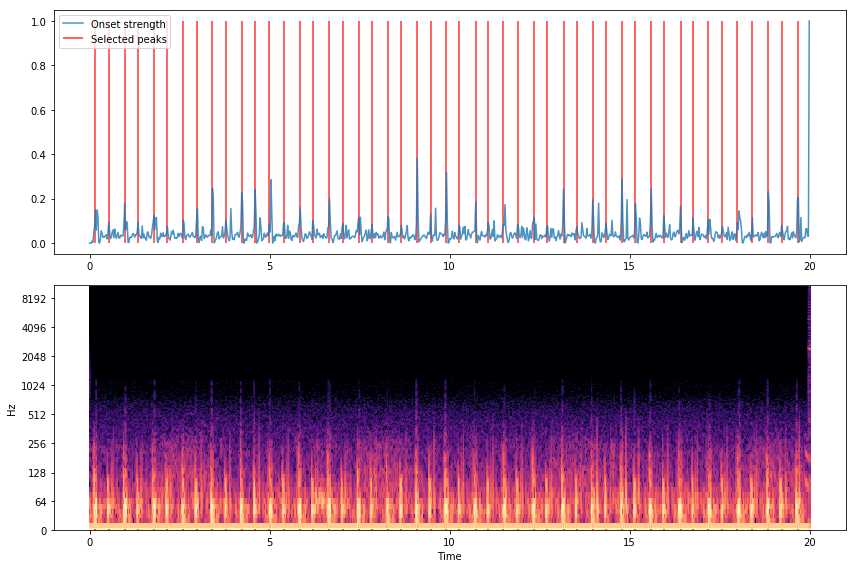

In [10]:
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
librosa.frames_to_time(onset_frames, sr=sr)

o_env = librosa.onset.onset_strength(y, sr=sr)
times = librosa.frames_to_time(np.arange(len(o_env)), sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

peaks = librosa.util.peak_pick(o_env, 5, 2, 2, 2, 0.02, 13) # Tuning is need
print(peaks)

times = librosa.frames_to_time(np.arange(len(o_env)),sr=sr, hop_length=512)
plt.figure(figsize=(12,8))
ax = plt.subplot(2, 1, 2)
D = librosa.stft(y)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time')
plt.vlines(times[peaks], 0,o_env.max(), color='r', alpha=0.8,label='Selected peaks')

plt.subplot(2, 1, 1, sharex=ax)
plt.plot(times, o_env, alpha=0.8, label='Onset strength')
plt.vlines(times[peaks], 0,o_env.max(), color='r', alpha=0.8,label='Selected peaks')
plt.legend(frameon=True, framealpha=0.8)
plt.axis('tight')
plt.tight_layout()

### 4. Heart / Lung sound seperation (using Harmonic-Percussive separation)

/home/keewon/.local/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


save lung sound only


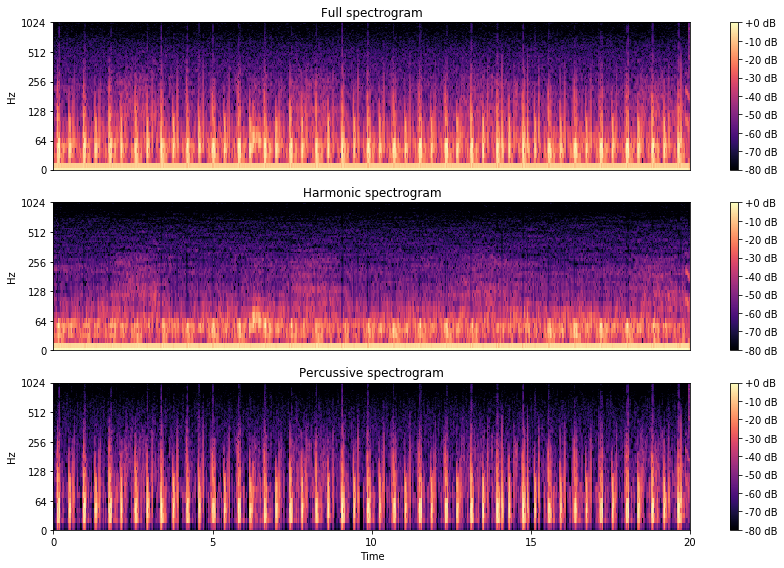

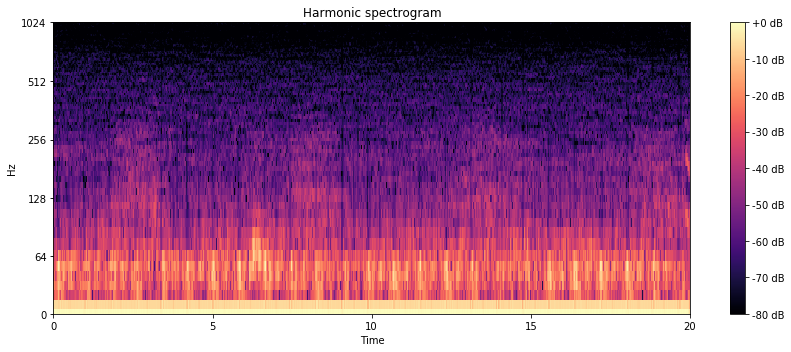

In [11]:
# D = librosa.stft(y)
# Decompose D into harmonic and percussive components
D_harmonic, D_percussive = librosa.decompose.hpss(D)

# Pre-compute a global reference power from the input spectrum
# rp = np.max(np.abs(D))**2

plt.figure(figsize=(12, 8))
plt.subplot(3,1,1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0,1024))
plt.colorbar(format='%+2.0f dB')
plt.title('Full spectrogram')
plt.subplot(3,1,2)
librosa.display.specshow(librosa.amplitude_to_db(D_harmonic, ref=np.max), y_axis='log')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0,1024))
plt.colorbar(format='%+2.0f dB')
plt.title('Harmonic spectrogram')
plt.subplot(3,1,3)
librosa.display.specshow(librosa.amplitude_to_db(D_percussive, ref=np.max), y_axis='log', x_axis='time')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0,1024))
plt.colorbar(format='%+2.0f dB')
plt.title('Percussive spectrogram')
plt.tight_layout()


# save lung sound only
print('save lung sound only')
plt.figure(figsize=(12, 5))
librosa.display.specshow(librosa.amplitude_to_db(D_harmonic, ref=np.max), y_axis='log', x_axis='time')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0,1024))
plt.colorbar(format='%+2.0f dB')
plt.title('Harmonic spectrogram')
plt.tight_layout()
plt.savefig('output/'+fname+'/'+fname_with_time+'/'+fname_with_time+'_only lung sound.png',bbox_inches='tight')

In [12]:
Audio(data=y, rate=sr)

In [ ]:
Audio(data=librosa.istft(D_harmonic), rate=sr)

In [ ]:
Audio(data=librosa.istft(D_percussive), rate=sr)

In [ ]:
audio_path = 'output/'+fname+'/'+fname_with_time+'/'+fname_with_time+'_lung.wav'
librosa.output.write_wav(audio_path,librosa.istft(D_harmonic), 22050)
audio_path = 'output/'+fname+'/'+fname_with_time+'/'+fname_with_time+'_heart.wav'
librosa.output.write_wav(audio_path,librosa.istft(D_percussive), 22050)

y_harm, y_perc = librosa.effects.hpss(y)

plt.figure(figsize=(12,4))
librosa.display.waveplot(y, sr=sr, alpha=1, color='b')
plt.title('Original')
plt.tight_layout()
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,-1,1))

plt.figure(figsize=(12,4))
# librosa.display.waveplot(y, sr=sr, alpha=1)
librosa.display.waveplot(y_harm, sr=sr, color='b', alpha=0.25)
librosa.display.waveplot(y_perc, sr=sr, color='r', alpha=0.5)
plt.title('Harmonic + Percussive')
plt.tight_layout()
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,-1,1))

### 5.MFCC 

In [ ]:
y, sr = librosa.load(audio_path,sr=2500)

S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128,n_fft=1024)
log_S = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='log')
plt.title('mel power spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.axis([0,len(y)/2500,0,1024])
plt.tight_layout()
# plt.savefig('output/'+fname+'/'+fname_with_time+'/'+fname_with_time+'_mel power spectrum.jpg',bbox_inches='tight')

y_harmonic, y_percussive = librosa.effects.hpss(y)
S_harmonic   = librosa.feature.melspectrogram(y_harmonic, sr=sr)
S_percussive = librosa.feature.melspectrogram(y_percussive, sr=sr)
log_Sh = librosa.amplitude_to_db(S_harmonic, ref=np.max)
log_Sp = librosa.amplitude_to_db(S_percussive, ref=np.max)

plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
librosa.display.specshow(log_Sh, sr=sr, y_axis='log')
plt.title('mel power spectrogram (harmonic)')
plt.axis([0,len(y)/2500,0,1024])
plt.colorbar(format='%+02.0f dB')

plt.subplot(2,1,2)
librosa.display.specshow(log_Sp, sr=sr, x_axis='time', y_axis='log')
plt.title('mel power spectrogram (percussive)')
plt.axis([0,len(y)/2500,0,1024])
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

In [ ]:
# Extract the top 13 Mel-frequency cepstral coefficients (MFCCs)
mfcc        = librosa.feature.mfcc(S=log_S, n_mfcc=13)
delta_mfcc  = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(12, 10))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()
plt.tight_layout()

print('save figure')
plt.savefig('output/'+fname+'/'+fname_with_time+'/'+fname_with_time+'_MFCC.jpg',bbox_inches='tight')